In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pickle
import json
import logging
logging.basicConfig(level=logging.INFO, handlers=[logging.FileHandler("ensemble.log"), logging.StreamHandler(sys.stdout)])

import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from evaluation import *
from preprocessing import Corpus, BasicPreprocessing, BigramPreprocessor, SpacyPreprocessor, StopWordPreprocessor
from retrieval_algorithms.ensemble_retrieval_algorithm import EnsembleRetrievalAlgorithm

In [53]:
with open("../../data/kit_expert_2019_all_keywords.json", "r") as file:
    keywords = json.load(file)

In [54]:
general_keywords = [k for k in keywords if k["level"]<=1]
specific_keywords = [k for k in keywords if k["level"]>=2 and len(k["paper_ids"])>=10]

general_keywords_val = ("general keywords validation", general_keywords[0:int(len(general_keywords)*0.8)])
specific_keywords_val = ("specific keywords validation", specific_keywords[0:int(len(specific_keywords)*0.8)])
general_keywords_test = ("general keywords test", general_keywords[int(len(general_keywords)*0.8):])
specific_keywords_test = ("specific keywords test", specific_keywords[int(len(specific_keywords)*0.8):])

In [2]:
bm25_file_path = "../../data/models/tfidf/bm25_oqe.model"
sent2vec_file_path = "../../data/models/sent2vec/sent2vec_oqe.model"

In [56]:
weight_grid = [0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
search_ensemble_models = [(f"ensemble weight={w}", 
                      EnsembleRetrievalAlgorithm(bm25_file_path, sent2vec_file_path, w),
                      None) for w in weight_grid]

In [ ]:
search_ensemble_results = train_evaluate_models(search_ensemble_models, [general_keywords_val, specific_keywords_val], n_jobs=4)

INFO:root:Start training model ensemble weight=0.002
INFO:root:Start training model ensemble weight=0.006
INFO:root:Start training model ensemble weight=0.01
INFO:root:Start training model ensemble weight=0.04


In [61]:
search_ensemble_results

general keywords validation                                                                              specific keywords validation                                                                             
                                              p@5          p@10          p@20        R-prec           mAP         bpref                                 p@5          p@10          p@20        R-prec           mAP         bpref       
                                              avg    err    avg    err    avg    err    avg    err    avg    err    avg    err                          avg    err    avg    err    avg    err    avg    err    avg    err    avg    err
ensemble weight=0.002                       0.475  0.043  0.438  0.039  0.404  0.038  0.266  0.022  0.234  0.022  0.219  0.021                        0.485  0.008  0.419  0.007  0.341  0.006  0.293  0.005  0.273  0.005  0.255  0.005
ensemble weight=0.004                       0.471  0.043  0.440  0.039  0.401  0.037  0.267  0.022  0.232  0.022  0.218  0.021                        0.561  0.008  0.491  0.007  0.400  0.007  0.353  0.005  0.340  0.006  0.319  0.005
ensemble weight=0.006                       0.456  0.043  0.433  0.039  0.391  0.036  0.264  0.022  0.229  0.022  0.216  0.021                        0.618  0.008  0.544  0.007  0.445  0.007  0.402  0.005  0.396  0.006  0.371  0.006
ensemble weight=0.008                       0.452  0.043  0.429  0.039  0.385  0.036  0.257  0.021  0.222  0.021  0.209  0.020                        0.657  0.008  0.584  0.007  0.480  0.006  0.441  0.005  0.440  0.006  0.415  0.006
ensemble weight=0.01                        0.444  0.043  0.419  0.039  0.379  0.036  0.255  0.022  0.218  0.021  0.207  0.020                        0.685  0.008  0.613  0.007  0.507  0.006  0.471  0.005  0.476  0.006  0.450  0.006
ensemble weight=0.02                        0.418  0.042  0.390  0.038  0.355  0.034  0.241  0.021  0.202  0.020  0.194  0.019                        0.731  0.007  0.671  0.007  0.564  0.006  0.546  0.006  0.559  0.006  0.537  0.006
ensemble weight=0.04                        0.383  0.040  0.364  0.036  0.333  0.033  0.226  0.020  0.183  0.019  0.177  0.018                        0.737  0.007  0.682  0.007  0.578  0.006  0.569  0.006  0.583  0.006  0.564  0.007
ensemble weight=0.06                        0.368  0.040  0.355  0.036  0.324  0.033  0.217  0.019  0.172  0.018  0.168  0.018                        0.735  0.007  0.682  0.007  0.578  0.006  0.571  0.006  0.585  0.006  0.567  0.007
ensemble weight=0.08                        0.364  0.040  0.349  0.036  0.321  0.033  0.210  0.019  0.166  0.018  0.162  0.017                        0.733  0.007  0.680  0.007  0.577  0.006  0.570  0.006  0.585  0.006  0.567  0.007
ensemble weight=0.1                         0.359  0.040  0.343  0.036  0.316  0.032  0.207  0.019  0.161  0.017  0.159  0.017                        0.732  0.007  0.679  0.007  0.576  0.006  0.570  0.006  0.584  0.006  0.566  0.007
ensemble weight=0.15                        0.351  0.040  0.336  0.036  0.310  0.032  0.200  0.018  0.154  0.017  0.152  0.016                        0.729  0.007  0.676  0.007  0.574  0.006  0.568  0.006  0.582  0.006  0.564  0.007
ensemble weight=0.2                         0.352  0.039  0.334  0.036  0.308  0.032  0.197  0.018  0.150  0.016  0.149  0.016                        0.726  0.007  0.674  0.007  0.572  0.006  0.567  0.006  0.580  0.006  0.563  0.007
ensemble weight=0.25                        0.347  0.039  0.332  0.035  0.306  0.032  0.195  0.018  0.148  0.016  0.147  0.016                        0.725  0.007  0.673  0.007  0.571  0.006  0.566  0.006  0.579  0.006  0.562  0.007
ensemble weight=0.3                         0.344  0.039  0.330  0.035  0.305  0.032  0.194  0.018  0.146  0.016  0.146  0.016                        0.724  0.007  0.672  0.007  0.570  0.006  0.566  0.006  0.578  0.006  0.561  0.007
ensemble weight=0.35                        0.344  0.039  0.3

In [62]:
search_ensemble_results.to_csv("../../data/results/ensemble_results_fine_2.csv")

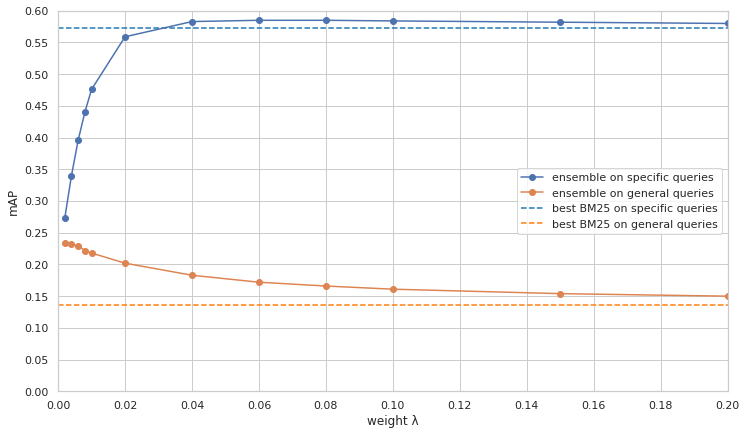

In [67]:
plot_data = search_ensemble_results.xs('mAP', level=1, axis=1).xs('avg', level=1, axis=1)
err_data = search_ensemble_results.xs('mAP', level=1, axis=1).xs('err', level=1, axis=1)
plot_data.index = weight_grid
ax = plot_data.iloc[:,1].plot(label="ensemble on specific queries", figsize=(12,7), style="-o", legend=True, xlim=(0,0.2), ylim=(0,0.6), yticks=np.arange(0,1,0.05), xticks=np.arange(0,0.3,0.02)) #, xticks=[0]+np.linspace(0,1,11), xlim=(0,1), ylim=(0.0,0.3))
ax = plot_data.iloc[:,0].plot(label="ensemble on general queries", figsize=(12,7), style="-o", legend=True)#, xticks=[0]+np.linspace(0,1,11), xlim=(0,1), ylim=(0.0,0.3))
plt.hlines(0.573,0,1, linestyles='dashed', color='tab:blue', label="best BM25 on specific queries")
plt.hlines(0.136,0,1, linestyles='dashed', color='tab:orange', label="best BM25 on general queries")
ax.set_ylabel("mAP");
ax.set_xlabel("weight λ")
ax.legend(loc="center right")
plt.savefig("images/ensemble_model.pdf", transparent=True, bbox_inches="tight")

In [19]:
plot_data.iloc[:,1]

0.002    0.288
0.004    0.352
0.006    0.399
0.008    0.436
0.010    0.464
0.020    0.533
0.040    0.556
0.060    0.558
0.080    0.558
0.100    0.557
0.150    0.555
0.200    0.554
0.250    0.553
0.300    0.552
0.350    0.552
0.400    0.551
0.450    0.551
0.500    0.551
Name: specific keywords validation, dtype: float64

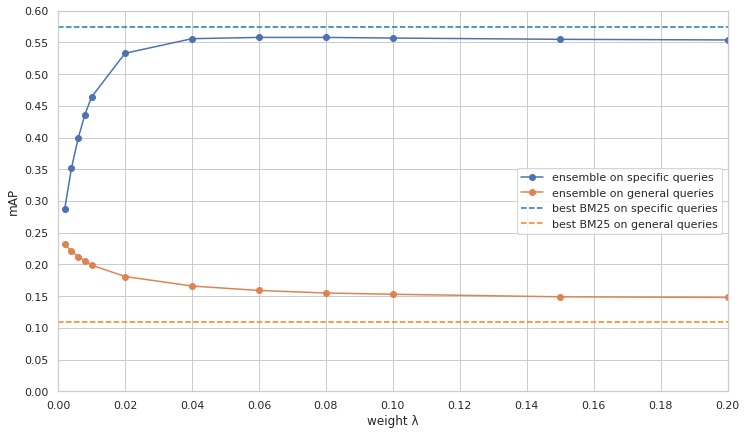

In [46]:
plot_data = search_ensemble_results.xs('mAP', level=1, axis=1).xs('avg', level=1, axis=1)
err_data = search_ensemble_results.xs('mAP', level=1, axis=1).xs('err', level=1, axis=1)
plot_data.index = weight_grid
ax = plot_data.iloc[:,1].plot(label="ensemble on specific queries", figsize=(12,7), style="-o", legend=True, xlim=(0,0.2), ylim=(0,0.6), yticks=np.arange(0,1,0.05), xticks=np.arange(0,0.3,0.02)) #, xticks=[0]+np.linspace(0,1,11), xlim=(0,1), ylim=(0.0,0.3))
ax = plot_data.iloc[:,0].plot(label="ensemble on general queries", figsize=(12,7), style="-o", legend=True)#, xticks=[0]+np.linspace(0,1,11), xlim=(0,1), ylim=(0.0,0.3))
plt.hlines(0.575,0,1, linestyles='dashed', color='tab:blue', label="best BM25 on specific queries")
plt.hlines(0.110,0,1, linestyles='dashed', color='tab:orange', label="best BM25 on general queries")
ax.set_ylabel("mAP");
ax.set_xlabel("weight λ")
ax.legend(loc="center right")
plt.savefig("images/ensemble_model.pdf", transparent=True, bbox_inches="tight")

In [14]:
search_ensemble_results

general keywords validation                                                                              specific keywords validation                                                                             
                                              p@5          p@10          p@20        R-prec           mAP         bpref                                 p@5          p@10          p@20        R-prec           mAP         bpref       
                                              avg    err    avg    err    avg    err    avg    err    avg    err    avg    err                          avg    err    avg    err    avg    err    avg    err    avg    err    avg    err
ensemble weight=0.002                       0.464  0.042  0.437  0.039  0.399  0.037  0.262  0.022  0.232  0.022  0.217  0.021                        0.490  0.008  0.427  0.007  0.351  0.006  0.306  0.005  0.288  0.005  0.270  0.005
ensemble weight=0.004                       0.443  0.041  0.417  0.038  0.386  0.036  0.254  0.021  0.221  0.021  0.207  0.020                        0.556  0.008  0.489  0.007  0.405  0.007  0.363  0.005  0.352  0.006  0.330  0.006
ensemble weight=0.006                       0.428  0.041  0.404  0.038  0.374  0.036  0.248  0.021  0.212  0.020  0.201  0.020                        0.602  0.008  0.534  0.007  0.441  0.006  0.405  0.005  0.399  0.006  0.375  0.006
ensemble weight=0.008                       0.418  0.041  0.390  0.037  0.362  0.035  0.243  0.021  0.206  0.020  0.195  0.019                        0.633  0.008  0.565  0.007  0.470  0.006  0.437  0.005  0.436  0.006  0.410  0.006
ensemble weight=0.01                        0.402  0.040  0.378  0.036  0.356  0.035  0.237  0.020  0.199  0.019  0.190  0.019                        0.654  0.008  0.589  0.007  0.491  0.006  0.463  0.005  0.464  0.006  0.439  0.006
ensemble weight=0.02                        0.369  0.039  0.363  0.035  0.339  0.034  0.223  0.020  0.181  0.018  0.174  0.018                        0.695  0.007  0.638  0.007  0.540  0.006  0.524  0.006  0.533  0.006  0.511  0.006
ensemble weight=0.04                        0.357  0.038  0.350  0.035  0.323  0.033  0.208  0.019  0.166  0.017  0.161  0.017                        0.698  0.007  0.649  0.007  0.554  0.006  0.547  0.006  0.556  0.006  0.537  0.006
ensemble weight=0.06                        0.354  0.038  0.347  0.035  0.318  0.033  0.204  0.019  0.159  0.017  0.157  0.016                        0.696  0.007  0.648  0.007  0.554  0.006  0.550  0.006  0.558  0.006  0.540  0.007
ensemble weight=0.08                        0.347  0.038  0.345  0.035  0.315  0.033  0.201  0.018  0.155  0.017  0.154  0.016                        0.695  0.007  0.646  0.007  0.554  0.006  0.549  0.006  0.558  0.006  0.540  0.007
ensemble weight=0.1                         0.347  0.038  0.342  0.035  0.312  0.033  0.199  0.018  0.153  0.016  0.152  0.016                        0.693  0.007  0.646  0.007  0.553  0.006  0.549  0.006  0.557  0.006  0.540  0.007
ensemble weight=0.15                        0.345  0.038  0.337  0.035  0.311  0.033  0.196  0.018  0.149  0.016  0.149  0.016                        0.691  0.007  0.644  0.007  0.551  0.006  0.548  0.006  0.555  0.006  0.539  0.007
ensemble weight=0.2                         0.343  0.038  0.335  0.035  0.310  0.033  0.194  0.018  0.148  0.016  0.147  0.015                        0.690  0.007  0.642  0.007  0.550  0.006  0.548  0.006  0.554  0.006  0.538  0.007
ensemble weight=0.25                        0.344  0.038  0.335  0.035  0.309  0.033  0.193  0.018  0.147  0.016  0.146  0.015                        0.688  0.007  0.641  0.007  0.549  0.006  0.547  0.006  0.553  0.006  0.537  0.007
ensemble weight=0.3                         0.342  0.038  0.335  0.035  0.309  0.033  0.192  0.018  0.146  0.016  0.146  0.015                        0.688  0.007  0.641  0.007  0.548  0.006  0.547  0.006  0.552  0.006  0.537  0.007
ensemble weight=0.35                        0.342  0.038  0.3

In [10]:
search_ensemble_results

general keywords validation                                                                              specific keywords validation                                                                             
                                              p@5          p@10          p@20        R-prec           mAP         bpref                                 p@5          p@10          p@20        R-prec           mAP         bpref       
                                              avg    err    avg    err    avg    err    avg    err    avg    err    avg    err                          avg    err    avg    err    avg    err    avg    err    avg    err    avg    err
ensemble weight=0.001                       0.478  0.043  0.447  0.039  0.402  0.037  0.264  0.022  0.234  0.022  0.218  0.022                        0.445  0.008  0.386  0.007  0.315  0.006  0.269  0.005  0.247  0.005  0.231  0.005
ensemble weight=0.01                        0.402  0.040  0.378  0.036  0.356  0.035  0.237  0.020  0.199  0.019  0.190  0.019                        0.654  0.008  0.589  0.007  0.491  0.006  0.463  0.005  0.464  0.006  0.439  0.006
ensemble weight=0.1                         0.347  0.038  0.342  0.035  0.312  0.033  0.199  0.018  0.153  0.016  0.152  0.016                        0.693  0.007  0.646  0.007  0.553  0.006  0.549  0.006  0.557  0.006  0.540  0.007
ensemble weight=0.5                         0.342  0.037  0.335  0.035  0.307  0.033  0.192  0.017  0.144  0.016  0.145  0.015                        0.686  0.007  0.639  0.007  0.547  0.006  0.545  0.006  0.551  0.006  0.535  0.007
ensemble weight=0.9                         0.345  0.038  0.332  0.034  0.305  0.032  0.190  0.017  0.144  0.016  0.144  0.015                        0.684  0.007  0.638  0.007  0.546  0.006  0.544  0.006  0.549  0.006  0.534  0.007

In [3]:
ensemble_model = EnsembleRetrievalAlgorithm(bm25_file_path, sent2vec_file_path, 0.02)
ensemble_model.prepare(None)
file_path = "../../data/models/ensemble_model.model"
with open(file_path, "wb") as file:
    pickle.dump(ensemble_model, file)